<a href="https://colab.research.google.com/github/nhanguyenai/LinearRegression-Basic/blob/main/Buoi3Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


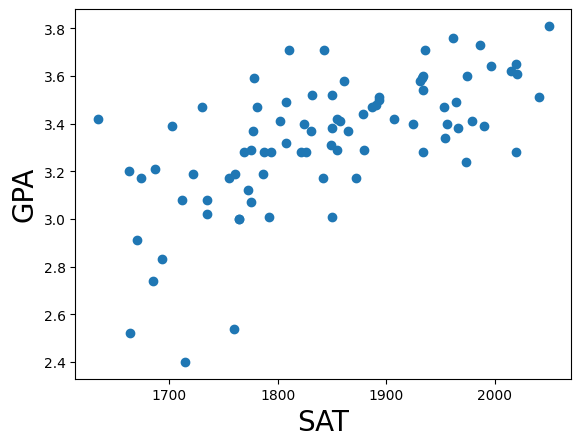

In [ ]:
x=data['SAT']
y= data['GPA']
plt.scatter(x,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

He so goc [0.00165569]
goc giua duong hoi quy va truc tung 0.2750402996602799


<Axes: xlabel='SAT', ylabel='GPA'>

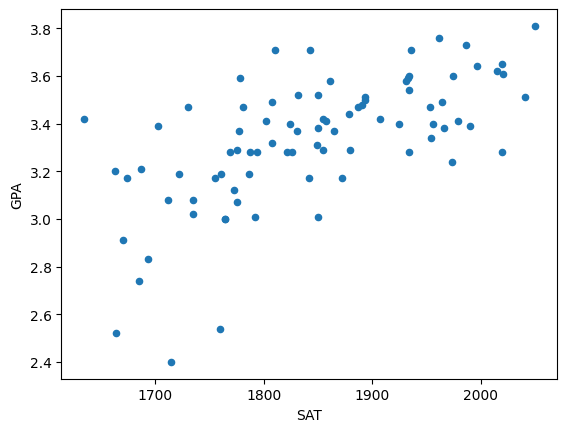

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=pd.DataFrame(data['SAT']),y=data['GPA'])
print('He so goc',model.coef_)
print("goc giua duong hoi quy va truc tung",model.intercept_)
data.plot(kind='scatter',x='SAT',y='GPA')

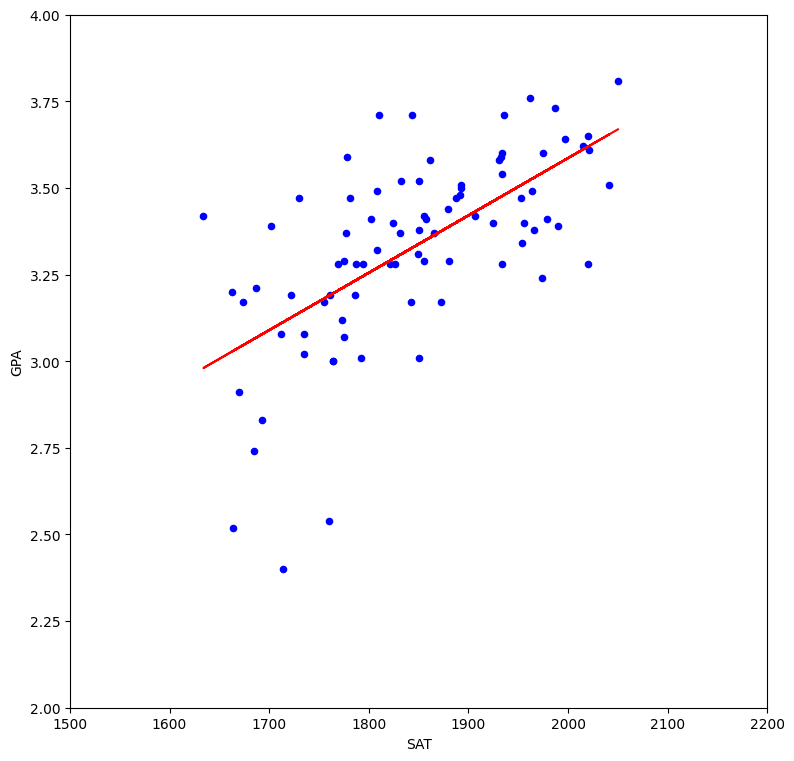

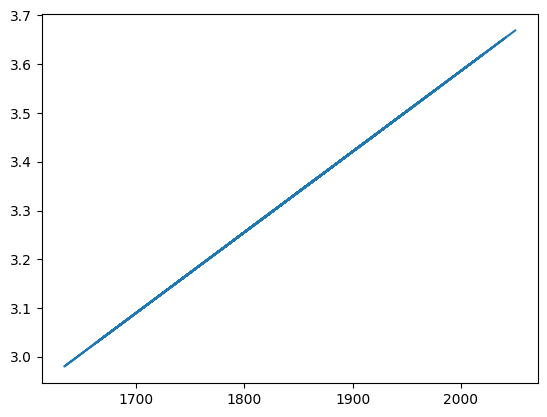

In [ ]:
y_pred=model.predict(X=pd.DataFrame(data['SAT']))
data.plot(kind='scatter',x='SAT',y='GPA',figsize=(9,9),color='blue',xlim=(1500,2200),ylim=(2,4))
plt.plot(data['SAT'],y_pred,color='red')
plt.show()
plt.plot(data['SAT'],y_pred)

In [ ]:
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


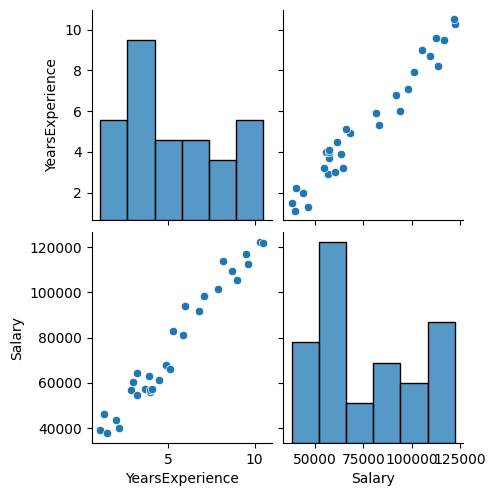

In [ ]:
x=dataset.drop(['Salary'],axis=True)
y=dataset['Salary']
#Chia du lieu
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
sns.pairplot(dataset)

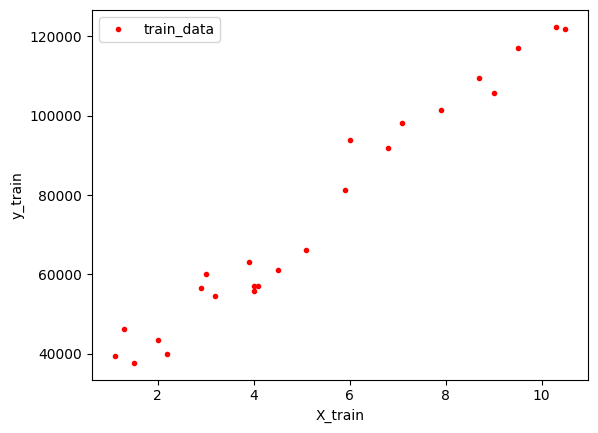

In [ ]:
plt.plot(x_train,y_train,'r.',label='train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

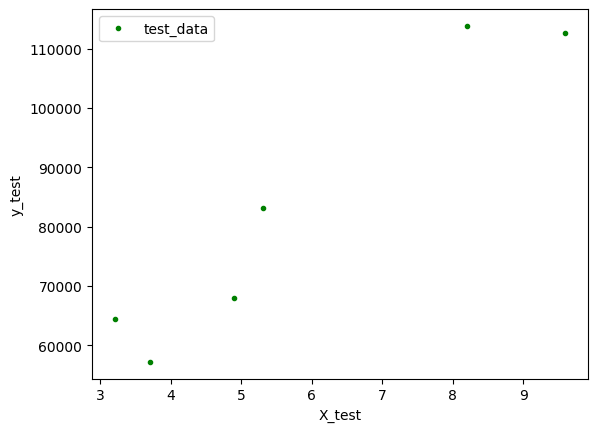

In [ ]:
plt.plot(x_test,y_test,'g.',label='test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test).round(1)
calculation=pd.DataFrame(np.c_[y_test,y_pred],columns=["Original Slary","Predict Salary"])
calculation

,Original Slary,Predict Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


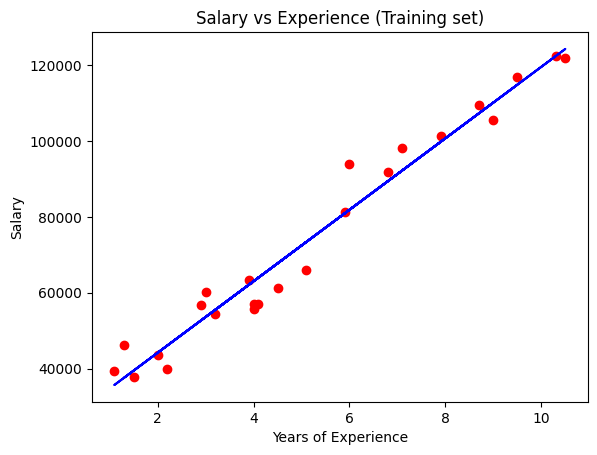

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
data=pd.read_csv('/content/50_Startups.csv')
data.head()
data = data.drop('State', axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


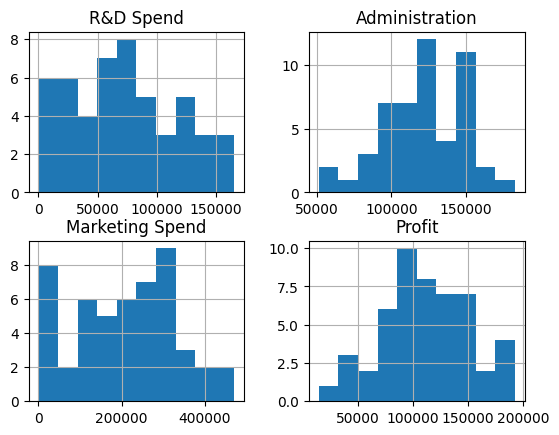

In [ ]:
data.hist()
plt.show()

In [ ]:
correlation=data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<Axes: >

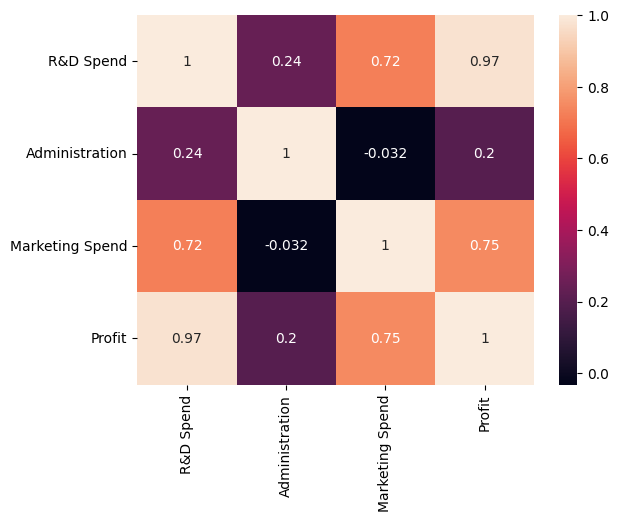

In [ ]:
sns.heatmap(correlation,annot=True)

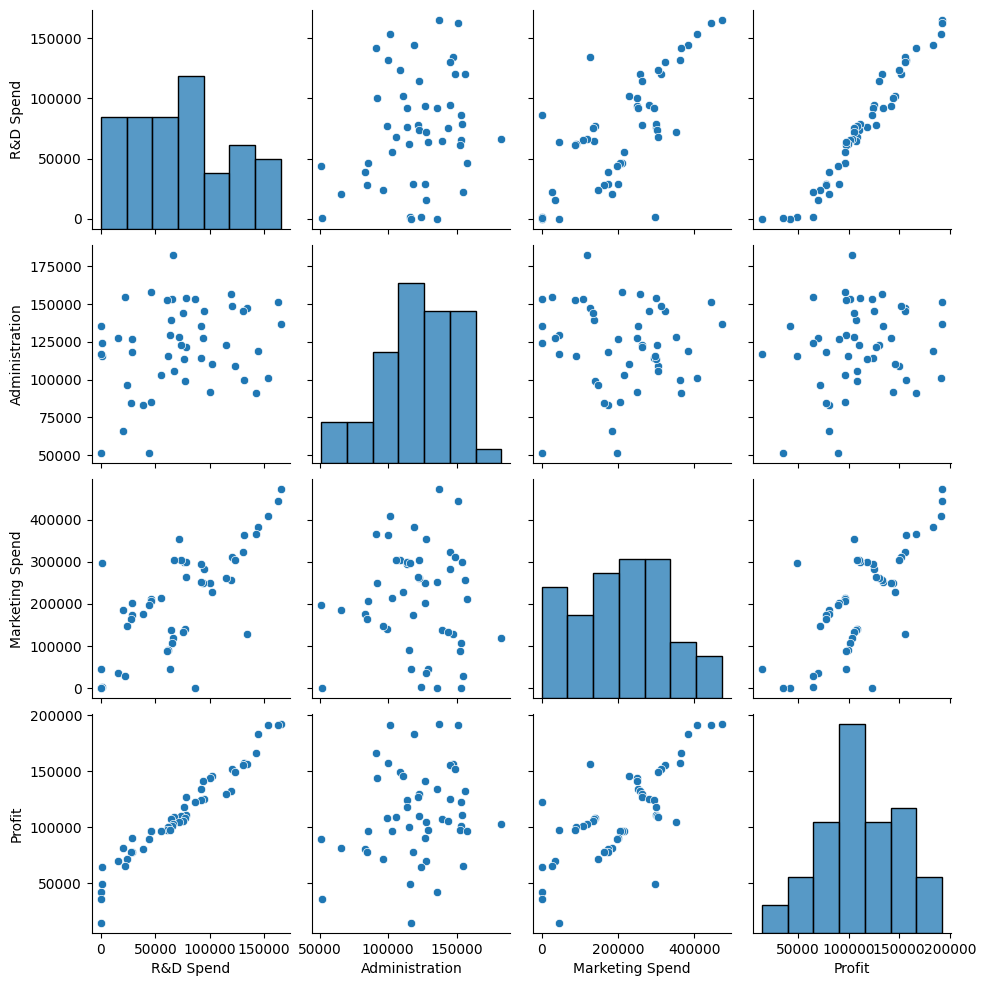

In [ ]:
sns.pairplot(data)

In [ ]:
model=LinearRegression()
model.fit(X=pd.DataFrame(data['R&D Spend']),y=data['Profit'])
print('He so cua duong hoi quy',model.coef_)
print("goc giua duong hoi quy va truc tung",model.intercept_)

He so cua duong hoi quy [0.85429137]
goc giua duong hoi quy va truc tung 49032.89914125215


In [ ]:
model.score(X=pd.DataFrame(data['R&D Spend']),y=data['Profit'])

0.9465353160804393

In [ ]:
train_prediction=model.predict(X=pd.DataFrame(data['R&D Spend']))
residuals=data['Profit']-train_prediction
residuals.describe()

,Profit
count,5.000000e+01
mean,-1.702574e-11
std,9.319769e+03
min,-3.435150e+04
25%,-4.625864e+03
50%,-3.747892e+02
75%,6.248922e+03
max,1.718809e+04


In [ ]:
y_pred=model.predict(X=pd.DataFrame(data['R&D Spend']))
error=data["Profit"]-y_pred
print(error)

0      1972.536107
1      3853.348814
2     10933.732922
3     10532.986794
4     -4246.033450
5     -4703.076837
6     -7911.215014
7     -4592.867250
8       200.436192
9     -4636.862861
10    10025.586029
11     9223.314135
12    12365.629190
13     6686.145890
14   -18896.724076
15   -16952.390933
16    11314.104166
17    -4527.324127
18    -3146.514820
19      -83.643130
20     4298.116260
21    -4687.326935
22    -1893.563246
23     2008.633222
24    -6298.892067
25     3128.937101
26    -7652.162765
27    -5625.489600
28    -2177.762715
29    -4074.454592
30    -2056.658451
31    -3777.621026
32    -5774.701080
33      338.018234
34     8018.509871
35     8137.230631
36    17188.088032
37     3267.662856
38    14914.196684
39     -967.341511
40     4642.434863
41     4937.249992
42     2269.348359
43     7479.669520
44    -2778.821050
45    15038.693001
46     -665.935268
47    -6473.169141
48   -13822.557779
49   -34351.499141
Name: Profit, dtype: float64


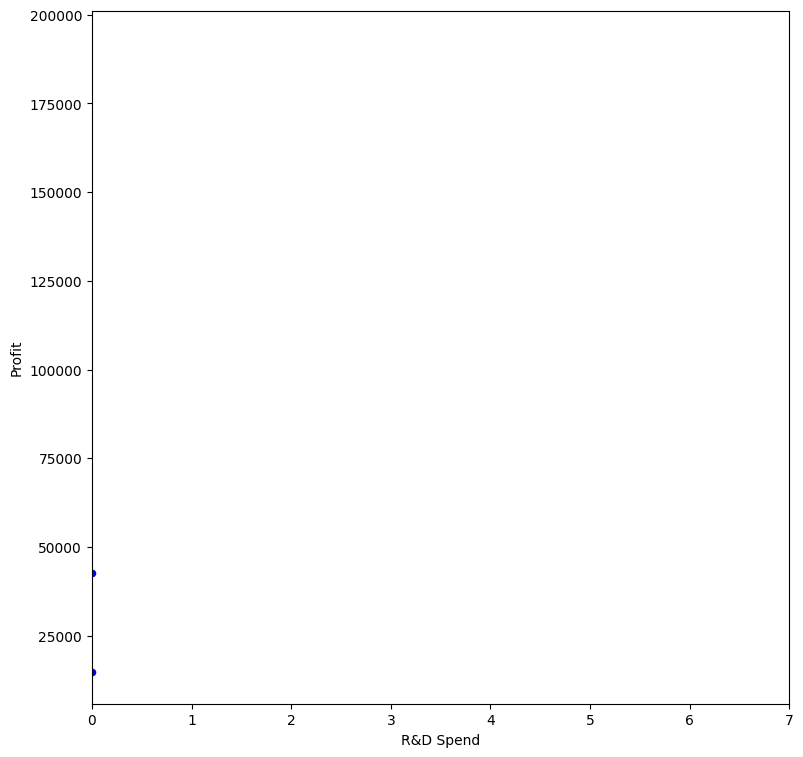

In [ ]:
data.plot(kind='scatter',x='R&D Spend',y='Profit',figsize=(9,9),color='blue',xlim=(0,7))
plt.plot(data['Profit'],y_pred,color='blue')

In [ ]:
model=LinearRegression()
model.fit(X=data.loc[:,['TV','Radio']],y=data['Sales'])
print(model.intercept_,model.coef_)

4.630879464097768 [0.05444896 0.10717457]


In [ ]:

poly_model=model.LinearRegression()
predictors=pd.DataFrame(data['wt'],data["wt"]**2).T
model.fit(x=predictors,y=data['mpg'])
print("Interception cua mo hinh")
print(model.intercept_)
print("coefficent cua mo hinh")
print(model.coef_)
print("do chinh xac cua mo hinh")
print(model.score(x=predictors,y=data['mpg']))

AttributeError: 'LinearRegression' object has no attribute 'LinearRegression'

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a new instance of LinearRegression for poly_model
poly_model = LinearRegression()
predictors = pd.DataFrame({'wt': data['wt'], 'wt_squared': data["wt"]**2}) # Create DataFrame with column names
poly_model.fit(X=predictors, y=data['mpg']) # Fit using the new model
print("Interception cua mo hinh")
print(poly_model.intercept_) # Access attributes of the new model
print("coefficent cua mo hinh")
print(poly_model.coef_)
print("do chinh xac cua mo hinh")
print(poly_model.score(X=predictors, y=data['mpg']))

Interception cua mo hinh
49.93081094945181
coefficent cua mo hinh
[-13.38033708   1.17108689]
do chinh xac cua mo hinh
0.8190613581384094


In [ ]:
import numpy as np
import pandas as pd

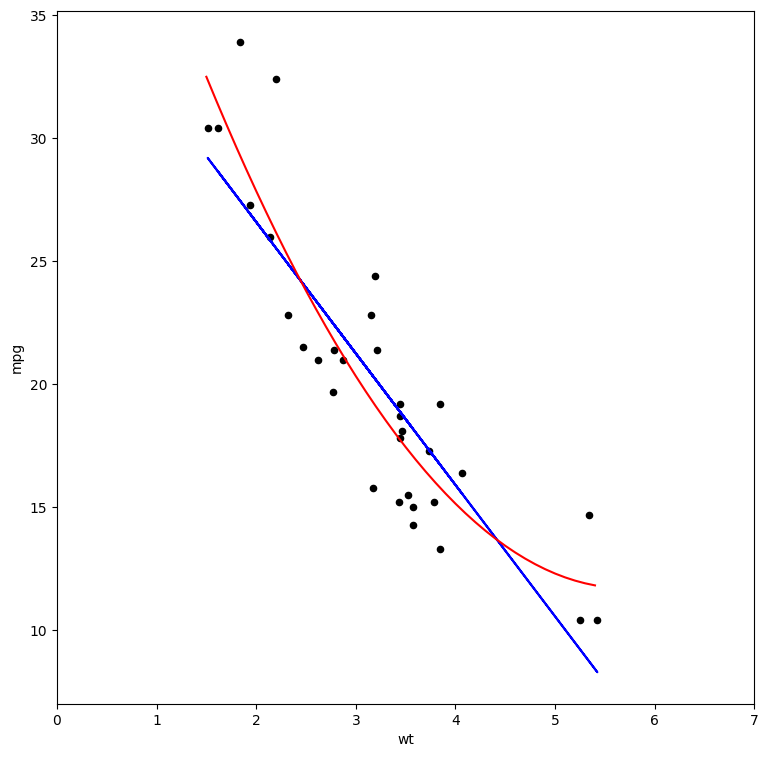

In [ ]:
poly_line_range = np.arange(1.5, 5.5, 0.1) # Changed 'arrange' to 'arange'
poly_predictors = pd.DataFrame({'wt': poly_line_range, 'wt_squared': poly_line_range**2}) # Give column names to the DataFrame
y_values = poly_model.predict(X=poly_predictors) # Pass 'X=' as the keyword argument
data.plot(kind='scatter', x='wt', y='mpg', figsize=(9, 9), color='black', xlim=(0, 7))
plt.plot(data['wt'], y_pred, color='blue')
plt.plot(poly_line_range, y_values, color='red')

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Tải bộ dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear')  # Sử dụng kernel tuyến tính
svm_model.fit(X_train, y_train)

# Đưa ra dự đoán
y_pred = svm_model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)

print(f"Độ chính xác: {accuracy:.2f}")

Độ chính xác: 1.00


In [ ]:
svm_rbf = SVC(kernel='rbf', gamma='scale')  # Kernel RBF
svm_rbf.fit(X_train, y_train)

# Đưa ra dự đoán trên tập kiểm tra
# Lưu ý: Đoạn mã gốc có một lỗi nhỏ, sử dụng 'svm_model' thay vì 'svm_rbf' ở đây.
# Tôi đã sửa lại thành 'svm_rbf' để sử dụng mô hình RBF đã huấn luyện.
y_pred_rbf = svm_rbf.predict(X_test)

# Đánh giá độ chính xác của mô hình RBF
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

print(f"Độ chính xác với Kernel RBF: {rbf_accuracy:.2f}")

Độ chính xác với Kernel RBF: 1.00
